## 텍스트 유사도

* 텍스트 유사도란 텍스트가 얼마나 유사한지를 표현하는 방식 중 하나
    * 유사도 측정 방법
        1. 자카드 유사도
        2. 유클리디언 유사도
        3. 맨해튼 유사도 
        4. 코사인 유사도

### 일단 텍스트 벡터화 진행

In [1]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.") 
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니': 1.4054651081081644, '있습니다': 1.4054651081081644, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


/Users/joon/opt/anaconda3/envs/study/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 자카드 유사도

* 두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식

![자카드 유사도](https://t1.daumcdn.net/cfile/tistory/99651E335C75E5CC3F '자카드유사도')
![자카드](https://miro.medium.com/max/1400/1*TG5hwQ3lYaKSCEBlvMlPPw.png '자카드')

In [3]:
# 자카드 유사도
from sklearn.metrics import jaccard_score

# jaccard_score(tfidf_matrix[0:1], tfidf_matrix[1:2])
jaccard_score(np.array([1,1,0,0]), np.array([1,1,0,2]), average=None)

array([0.5, 1. , 0. ])

### 코사인 유사도 
* 두개의 벡터값에서 코사인 각도를 구하는 방법

!['코사인유사도'](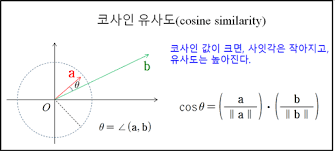 '코사인유사도')

In [4]:
# 코사인 유사도

from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도를 구해보자
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[0.11304078]])

### 유클리디언 유사도 
* n차원 공간에서 두 점 사이의 최단 거리를 구하는 접근법이다.
* 유클리디언 유사도는 단순히 두 점 사이의 거리를 나타내는 것이라 1보다 큰 값이 나올 수 있다.
* 그렇기 때문에 정규화를 통해서 다른 유사도 측정 방식과 동일하게 만든다

!['유클리디언유사도'](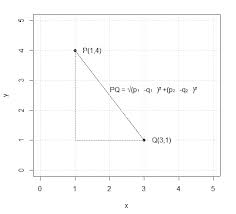 '유클리디언유사도')

In [6]:
# 유클리디안 유사도

from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])


array([[1.33188529]])

In [7]:
# 정규화

import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.21243357]])

### 맨해튼 유사도

* 맨해튼 거리를 통해 유사도를 측정하는 방법
* 맨해튼 유사도 또한 유클리디언 유사도와 동일한 이유로 정규화를 진행하고 유사도를 측정해야한다.

![맨해튼 유사도](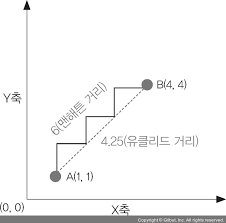 "맨해튼 유사도")


In [9]:
# 맨하탄 유사도

from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.85654185]])